In [ ]:
#importing important libraries
import requests
import os
from tqdm import tqdm
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin, urlparse
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [ ]:
# checks the validity of the url
# url should have netloc(domain name) and scheme(protocol)
def is_valid(url):
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

In [ ]:
# makes the url of a particular year and day
def get_url_from_day_year (year,day):
  url = "https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/" + str(year) + '_' + str(day) + '/'
  return url

In [ ]:
# return a list of all the IMG files which are their on a url of particular year and day.
# here input is a particular url which is of that particular year and day.
def get_all_images(url):
# html parser is used 
    soup = bs(requests.get(url).content, "html.parser")
    urls = []
    
# tqdm is used to see the progress of the loop
    for img in tqdm(soup.find_all("a"), "Extracting images"):
        img_url = img.attrs.get("href")
        IMG_checker = "IMG"

# IMG_checker is used to filter href link that contain .IMG format data. 
# make the URL absolute by joining domain with the URL that is just extracted
# the url is checked for it's validity
        if IMG_checker in img_url:
          img_url = urljoin(url, img_url)
          if is_valid(img_url):
            urls.append(img_url)           
    return urls

In [ ]:
# return a list of urls of all .IMG format image data files of a particular year and day.
# here input is year,day
def images_list (year,day):
  url = get_url_from_day_year (year,day)
  images_url_list = get_all_images(url)
  return images_url_list

In [ ]:
# download function download an image and save it at the pathname
# url of a particular image file should be given
def download(url, pathname):

    # if path doesn't exist, make that path dir
    if not os.path.isdir(pathname):
        os.makedirs(pathname)
    # download the body of response by chunk, not immediately
    response = requests.get(url, stream=True)
    # get the total file size
    file_size = int(response.headers.get("Content-Length", 0))
    # get the file name
    filename = os.path.join(pathname, url.split("/")[-1])
    # progress bar, changing the unit to bytes instead of iteration (default by tqdm)
    progress = tqdm(response.iter_content(1024), f"Downloading {filename}", total=file_size, unit="B", unit_scale=True, unit_divisor=1024)
    with open(filename, "wb") as f:
        for data in progress:
            # write data read to the file
            f.write(data)
            # update the progress bar manually
            progress.update(len(data))

In [ ]:
# this function download all the image data files of a particular year and day 
# and stores all of them at pathname 
def retrive_all_images (year,day,pathname):
  images_url_list = images_list(year,day)
  for url in images_url_list:
    download(url,pathname)

In [ ]:
# this function gives url of a particular image data file of a particular year and day
# particular image data file should be given with .IMG format.
def get_specific_url(year,day,file_name):
  images_url_list = images_list(year,day)
  for images_url in images_url_list:
    if file_name in images_url:
      return images_url
  return (" This file does not exist.")

In [ ]:
# removes the .IMG from the file name 
def file_num (string):
  final_str = ""
  for character in string:
    if (character == "."):
      return final_str
    final_str = final_str + character    

In [ ]:
# shape_function returns a type of shape which is needed for reshaping the array, this has been done for only 4 cases,
def shape_function (data):
  if len(data) == 134656 : 
    return (526,256)
  if len(data) == 527872 :
    return (1031,512)
  if len(data) == 1052672:
    return (1028,1024)
  if len(data) == 528384 :
    return (688,768)

In [ ]:
# open_specific_image takes input of year, day, file_name, and file_path (where to be stored),  gets the url of specific image, download it in .IMG format and 
# then read it plot that specific image and
# the figure can also be saved if plt.savefig is uncommented. 
# file_name should be put in with .IMG format

def open_specific_image(year,day,file_name,file_path):
  url = get_specific_url(year,day,file_name)
  
  download(url,file_path)

  # Parameters.
  input_filename = file_path + '/' + file_name
  dtype = np.dtype('>u2') # big-endian unsigned integer (16bit)
  output_filename = file_path + '/' + file_num(file_name) + '.JPG'

  # Reading.
  fid = open(input_filename, 'rb')
  data = np.fromfile(fid, dtype)
  shape = shape_function(data) # matrix size
  image = data.reshape(shape)
 
  # Display.
  plt.figure(figsize=(8,5), dpi= 250)
  plt.imshow(image, cmap = "gray", )
  #plt.savefig(output_filename)
  plt.show()

Extracting images: 100%|██████████| 131/131 [00:00<00:00, 27074.69it/s]


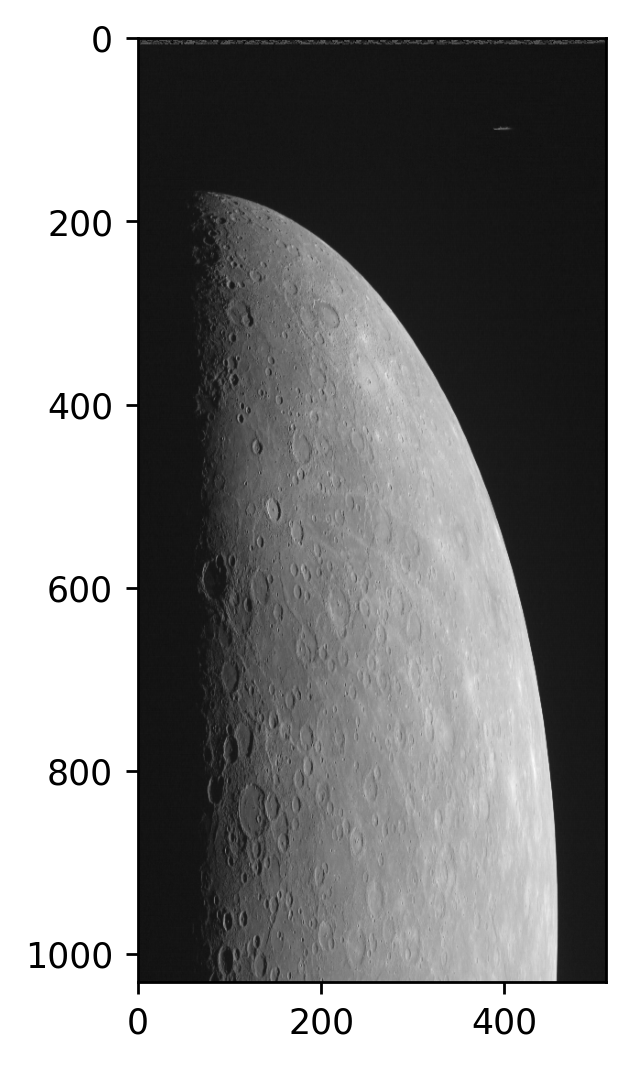

In [ ]:
open_specific_image(2011,207,"EW0220137668G.IMG","/content/images")

Extracting images: 100%|██████████| 203/203 [00:00<00:00, 24212.82it/s]


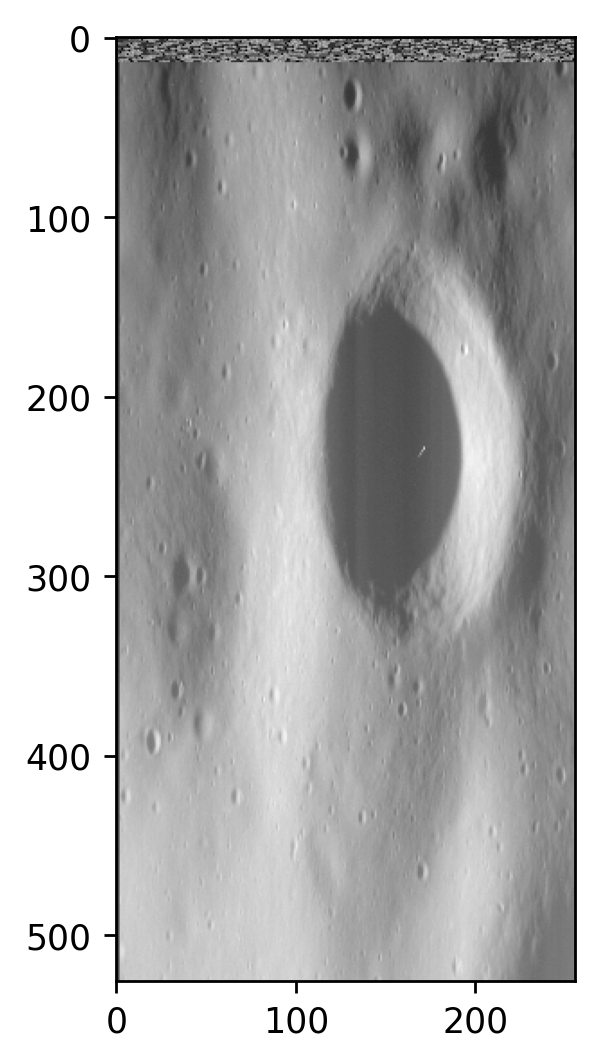

In [ ]:
open_specific_image(2014,215,"EN1049375684M.IMG","/content/images")

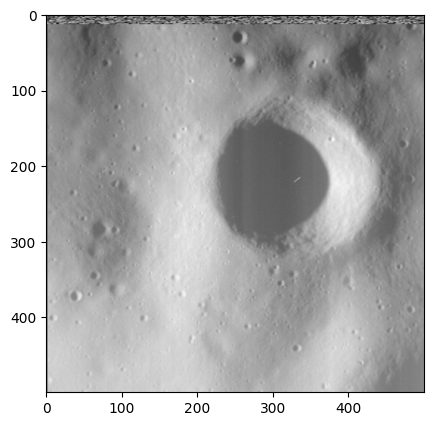

In [ ]:
# to visualize better lets turn the image data into (500,500) size
import cv2

fid = open("/content/images/EN1049375684M.IMG",'rb')
dtype = np.dtype('>u2')
data = np.fromfile(fid, dtype)
shape = shape_function(data) # matrix size
image = data.reshape(shape)
res = cv2.resize(image, dsize=(500,500), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(8,5), dpi= 100)
plt.imshow(res, cmap = "gray", )
plt.savefig("/content/images/EN1049375684M.JPG")
plt.show()

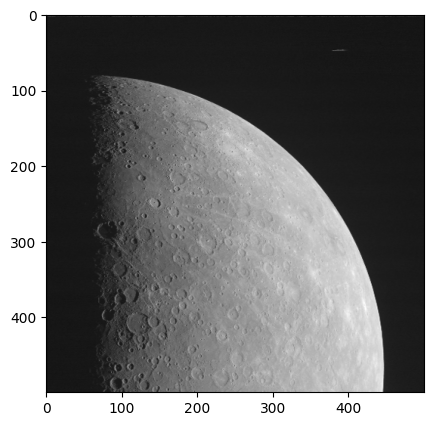

In [ ]:
fid = open("/content/images/EW0220137668G.IMG",'rb')
dtype = np.dtype('>u2')
data = np.fromfile(fid, dtype)
shape = shape_function(data) # matrix size
image = data.reshape(shape)
res = cv2.resize(image, dsize=(500,500), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(8,5), dpi= 100)
plt.imshow(res, cmap = "gray", )
plt.savefig("/content/images/EW0220137668G.JPG") 
plt.show()

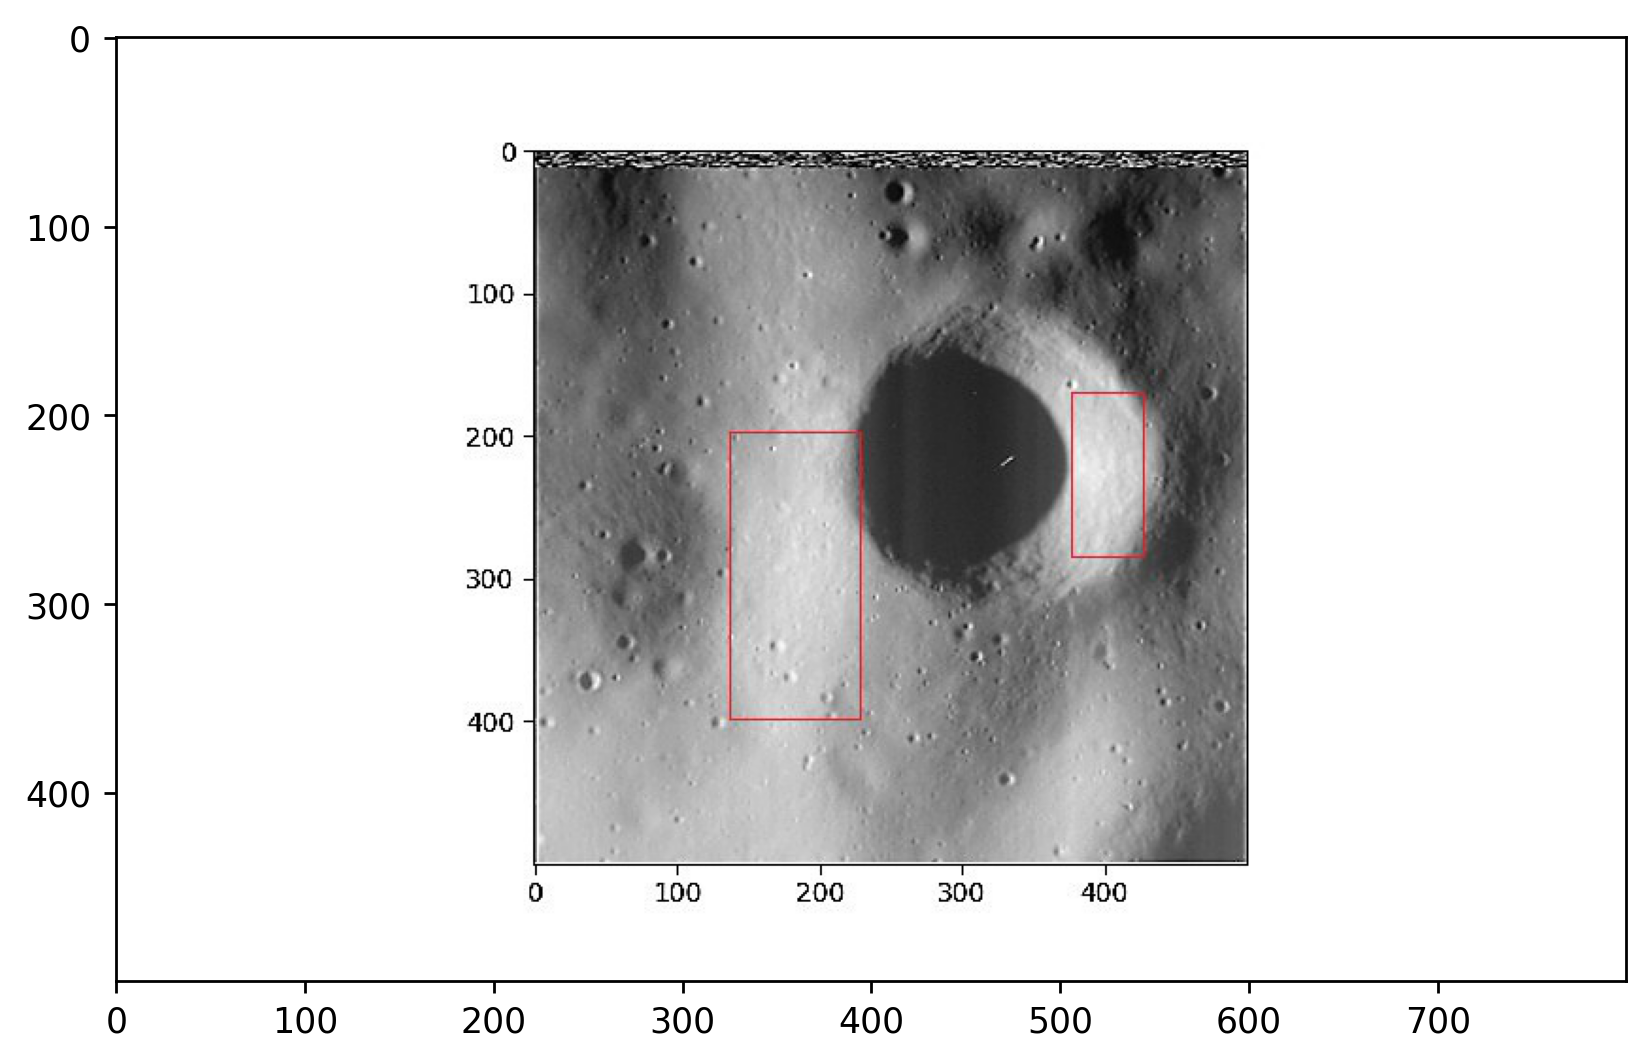

In [ ]:
img = mpimg.imread('/content/images/EN1049375684M.JPG') 
plt.figure(figsize=(8,5), dpi= 250)
plt.imshow(res, cmap = "gray", )
plt.imshow(img) 

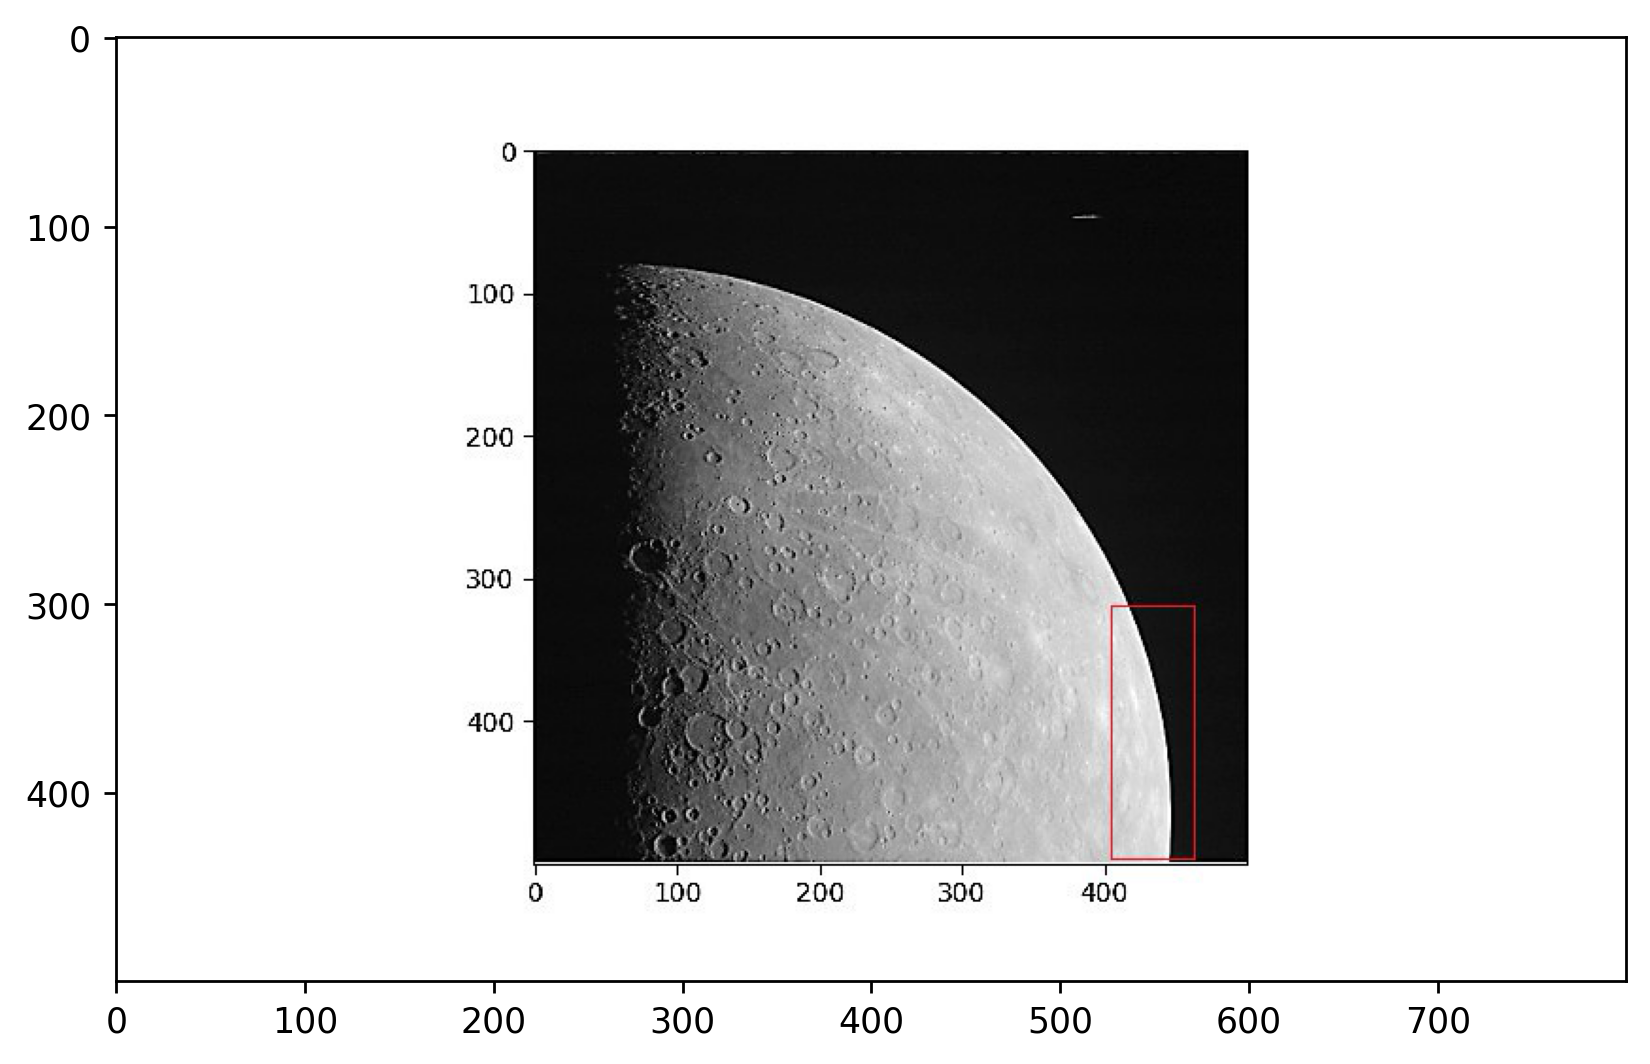

In [ ]:
img = mpimg.imread('/content/images/EW0220137668G.JPG') 
plt.figure(figsize=(8,5), dpi= 250)
plt.imshow(res, cmap = "gray", )
plt.imshow(img) 

# **The red regions are region of saturated pixels which represent the cosmic ray effect on these image.**

For these marked images: https://github.com/VIDIT-OSTWAL/CRISMIS